Train: 0.003, Test: 0.003


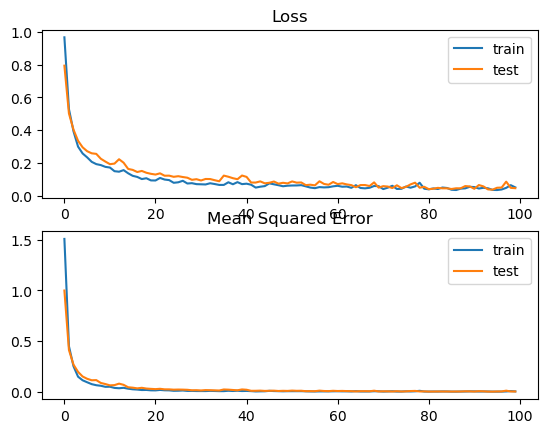

In [1]:
# mlp for regression with mae loss function 
from sklearn.datasets import make_regression 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from matplotlib import pyplot 
# generate regression dataset 
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1) 
# standardize dataset 
X = StandardScaler().fit_transform(X) 
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0] 
# split into train and test
n_train = 500 
trainX, testX = X[:n_train, :], X[n_train:, :] 
trainy, testy = y[:n_train], y[n_train:] 
# define model 
model = Sequential() 
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9) 
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
# fit model 
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse)) 
# plot loss during training 
pyplot.subplot(211) 
pyplot.title('Loss') 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend() 
# plot mse during training 
pyplot.subplot(212) 
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train') 
pyplot.plot(history.history['val_mse'], label='test') 
pyplot.legend() 
pyplot.show()